In [1]:
RunningInCOLAB = 'google.colab' in str(get_ipython())

if RunningInCOLAB:
    !pip install scipy, matplotlib

# Information Theory

[Information theory](https://en.wikipedia.org/wiki/Information_theory) is the scientific study of the quantification, storage, and communication of digital information.

It is a subfield of mathematics used extensively in computing ranging from signal processing, ML/AI, digital compression, and more. For more information please check out this [article](https://machinelearningmastery.com/what-is-information-entropy/), upon which this tutorial is derived.

In [2]:
%matplotlib inline

from math import log2
import matplotlib.pyplot as plt

## Information

Information is a measurement of "surprise". Rare events (low probability) are more surprising when they occur, thus they have high information. Common events (high probability) are less surprising when they occur, thus they have low information. Therefore we can calculate the information in an event via the probability of the event occuring. It follows the equation:

$$
\text{information}(x) = h(x) = -\log_2 (p(x)) \quad \text{where } p(x) \text{ is the probability of event x occurring}
$$

Note: information is log base 2. This means information is measured in bits and it can be interpreted as the number of bits required to represent the event.

Also note: the negative sign assures the result is $[0, +\infty)$

In [3]:
probability = 0.5  # Probability of the event

h = -log2(probability)

print("p(x) = {}, information = {} bits".format(probability, h))

p(x) = 0.5, information = 1.0 bits


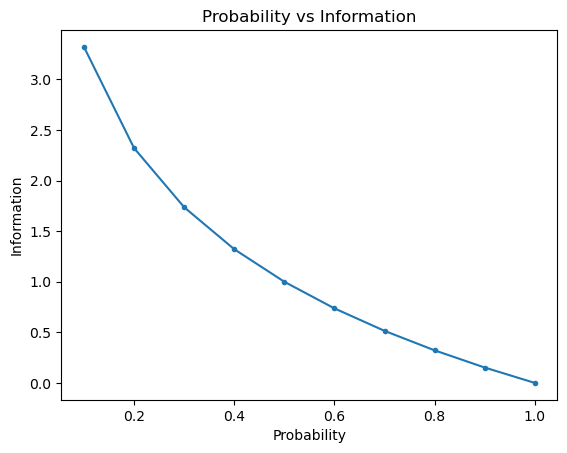

In [4]:
# list of probabilities
probs = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
# calculate information
info = [-log2(p) for p in probs]
# plot probability vs information
plt.plot(probs, info, marker='.')
plt.title('Probability vs Information')
plt.xlabel('Probability')
plt.ylabel('Information')
plt.show()

As can be seen, as the probability increases, the information gained decreases (but not linearly since we're using log!)

Also note, we can use other log bases for calculating entropy, this just simply changes the units. For instance, if $\ln(x)$ was used the units would change from bits to nats

## Entropy

Entropy is the information for a random variable X with a provided probability distribution p. It is denoted using $H(X)$ and simply the same as calculating the information for the probability distribution of events for the variable. 

With $k$ in $K$ discrete states the equation for entropy is:

$$
Entropy(X) = H(X) = -\sum_{k \in K} p(k) * log(p(k))
$$

In [5]:
n = 6  # the number of events
p = 1.0 /n  # probability of one event
e = -sum([p * log2(p) for _ in range(n)])  # calculate entropy
print('Hand Calculated Entropy: {:.4} bits'.format(e))

from scipy.stats import entropy

p = [1/6, 1/6, 1/6, 1/6, 1/6, 1/6]
e = entropy(p, base=2)  # Use scipy's entropy to verify
print('Scipy Entropy: {:.4} bits'.format(e))

Hand Calculated Entropy: 2.585 bits
Scipy Entropy: 2.585 bits


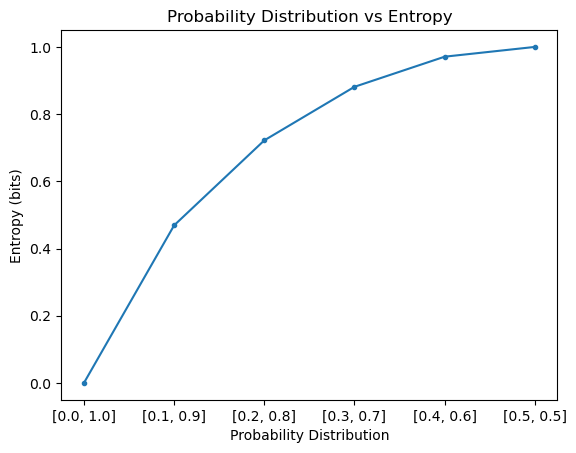

In [6]:
# calculate entropy
def entropy(events, ets=1e-15):
	return -sum([p * log2(p + ets) for p in events])
 
# define probabilities
probs = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]
# create probability distribution
dists = [[p, 1.0 - p] for p in probs]
# calculate entropy for each distribution
ents = [entropy(d) for d in dists]
# plot probability distribution vs entropy
plt.plot(probs, ents, marker='.')
plt.title('Probability Distribution vs Entropy')
plt.xticks(probs, [str(d) for d in dists])
plt.xlabel('Probability Distribution')
plt.ylabel('Entropy (bits)')
plt.show()

Note how the more balanced the probability distribution the higher the entropy. This again relates back to the idea of surprise. It says that the more skewed a distribution where a single random event dominates, the less surprising it is. The inverse is also true that the more balanced a distribution the more surprising an event is.

Entropy is the basis for calculating the differences between distributions using metrics such as KL-Divergence and Cross-Entropy.